# Data Analysis Project
## (dataset 03) - Spambase
### Maccarrone Adriana 

Data related to spam/no spam in emails.
The dataset can be downloaded following the URL:

https://archive-beta.ics.uci.edu/dataset/94/spambase


## 1: Data Acquisition

The spam-base dataset is a collection of spam and no-spam emails acquired from individuals who had marked them as archived.

<b>Dataset informations: </b> 
- <b>Number of instances</b>: **4601** in which **1813** are SPAM (39.4%)
- <b>Number of attributes</b>: 58 (57 continues, 1 categorial (class label).

The last column of the data matrix represents the label related to the belonging class (1: spam, 0:no-spam). 
L'ultima colonna della matrice dei dati denota l'etichetta relativa alla classe di appartenenza (1: spam, 0:no-spam). Many of the attributes indicate how frequently a particular word or character appears in the email text.

In [1]:
import pandas as pd
import csv
from matplotlib import pyplot as plt

#creation of a list for the attribute names specified in "spambase.names"
attribute_names = []
with open('spambase/names.txt', 'r') as r:
    for row in csv.reader(r):
        attribute_names.append(row[0])

In [2]:
#saving the acquired data into a pandas dataframe specifying for each columns its name. 

import pandas as pd
data=pd.read_csv('spambase/spambase.data', names = attribute_names)
data.head(20)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


##### Attributes definition
How it can be seen in the table above or also with the "data.info()" function, the dataset attributes can be described in the following way: 

- <b>word_freq_WORD</b> are 48 continues attributes that can assume real values in the range [0,100], which indicate the percentage of words equal to WORD contained in the email text. Frequency is calculated as: 100* (number of times that WORD appears in the email text) / the total number of words in the email text. In this case, a word is any string of alphanumeric characters delimited by non-alphanumeric characters or by the end-of-string character.
- <b>char_freq_CHAR</b> are 6 attributes that take continues real values in the range [0,100] and they indicate the percentage of characters equal to CHAR contained into the email text. 
- <b>capital_run_length_average</b> is an attribute that takes real values [1,...] and indicates the average length of uninterrupted sequences of capital letters. 
- <b>capital_run_length_longest</b> is an attribute that takes continuous integer values in the range  [1,...] and indicates the length of the longest uninterrupted sequences of capital letters. 
- <b>capital_run_length_total</b> is an attribute that takes continuous integer values in the range  [1,...] and indicates the sum of the lengths of the uninterrupted sequences of capital letters, i.e. the total number pf capital letters present in the e-mail text.
- <b>class</b> is a categorial attribute (nominal) {0, 1} that says when the e-mail is labelled as SPAM (1) or No-SPAM (0).

For each attributes their missing values are defined as "None". In many cases the variables that indicate the word or character frequencies present values equal to 0, this certainly indicates the case in which that word is not present in the particular record. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

The attribute **Class** is categorial and binary.

In [4]:
data['Class'].unique() 

array([1, 0], dtype=int64)

## 2: Data Cleaning 

Looking at the output of data.info() or the table above which shows some records, we can see how the types with which the various attributes are defined and the actual values assigned to them are congruent. Furthermore, they are also consistent with the mathematical and semantic meaning that they take on in the dataset.

I verify through the function "isnull" that the dataset does not have null values (NaN).

In [5]:
count_nan_in_df = data.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_df))

Count of NaN: 0


Through the "describe" function I calculate some basic statistics on the data such as numerousness of each column, average, standard deviation, min and max element and percentiles.

**The dataset is well structured and has no inconsistencies in the number of observations**. Furthermore, there appear to be no repetitions or incorrect values as previously demonstrated.

Looking at the row min and max of the describe function it is possible to verify that **the attribute values indicating the frequencies fall within the established ranges**. 
Usando le righe min e max della funzione describe che ci permettono di calcolare i valori di minimo e massimo per ogni colonna é possibile verificare che effettivamente **i valori degli attributi indicanti le frequenze ricadono nei range stabiliti**. Indeed, the lower limit of the range is respected, while the upper limit is higher than one because the frequencies have been multiplied by 100 (percentage), as described in the documentation. So dividing them by 100 brings them back to the correct range.

<b>Problem: the matrix is sparse</b>. It is possible to see that the quartil values are all equal to zero. This is due to the matrix sparsity (many values that concern the values of the frequencies have values equal to zero in most of the records) therefore it follows that the data are more concentrated near to zero, this generates noise and could compromise the statistical analysis of the dataset. 
For this reason, later in the project I decided to replace the values of 0.0 equal to nan for the attributes indicating the frequencies in order to remove them.

In [6]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [7]:
data[data['Class']==1].iloc[:,0:-4].max()

word_freq_make           4.540
word_freq_address        4.760
word_freq_all            3.700
word_freq_3d            42.810
word_freq_our            7.690
word_freq_over           2.540
word_freq_remove         7.270
word_freq_internet      11.110
word_freq_order          3.330
word_freq_mail           7.550
word_freq_receive        2.610
word_freq_will           6.250
word_freq_people         5.550
word_freq_report         4.760
word_freq_addresses      4.410
word_freq_free          16.660
word_freq_business       7.140
word_freq_email          9.090
word_freq_you           12.500
word_freq_credit        18.180
word_freq_your          11.110
word_freq_font          17.100
word_freq_000            5.450
word_freq_money         12.500
word_freq_hp             3.580
word_freq_hpl            1.770
word_freq_george         1.280
word_freq_650            9.090
word_freq_lab            0.470
word_freq_labs           3.380
word_freq_telnet         1.360
word_freq_857            0.470
word_fre

In [8]:
data_norm = data.iloc[:, 0:-4].divide(100)
data_norm.max()

word_freq_make          0.04540
word_freq_address       0.14280
word_freq_all           0.05100
word_freq_3d            0.42810
word_freq_our           0.10000
word_freq_over          0.05880
word_freq_remove        0.07270
word_freq_internet      0.11110
word_freq_order         0.05260
word_freq_mail          0.18180
word_freq_receive       0.02610
word_freq_will          0.09670
word_freq_people        0.05550
word_freq_report        0.10000
word_freq_addresses     0.04410
word_freq_free          0.20000
word_freq_business      0.07140
word_freq_email         0.09090
word_freq_you           0.18750
word_freq_credit        0.18180
word_freq_your          0.11110
word_freq_font          0.17100
word_freq_000           0.05450
word_freq_money         0.12500
word_freq_hp            0.20830
word_freq_hpl           0.16660
word_freq_george        0.33330
word_freq_650           0.09090
word_freq_lab           0.14280
word_freq_labs          0.05880
word_freq_telnet        0.12500
word_fre

## 3: Statistical exploration
In this phase I have computed the most expressive statistical descriptors for the available features. 

In particular, due to the classification problem I've tried to understand if there are significant values for my features in relation to the purpose of idetifying a SPAM or NOSPAM email.

I've enriched the computation of the indices with boxplots, histograms, pie charts in order to give a visual explanation.

#####  Is the dataset balanced?
Initially I computed the <b>numerosity</b> relating to the two classes (SPAM e NO-SPAM)to see if the dataset is balanced.

In [9]:
class_counts = data['Class'].value_counts()
class_counts
print("Spam: ", class_counts[1])
print("No-Spam: ", class_counts[0])

Spam:  1813
No-Spam:  2788


### PMF
The <b>Probability mass function</b> allows us to think in probabilistic terms and answer questions like: "If I choose a random element from the sample, what is the probability of obtaining a Spam type individual?".
La Probability Mass Function $f$ follows the following rules:
$$0 \leqslant f(x_i) \leqslant 1 \:\:\:\: \forall i = 1,...,N$$
$$\sum_{i}^{N} f(x_i) = 1$$
The two rules are satisfied by dividing the frequencies by the number of observations in the sample.
**I want to calculate the probability that, taking a random sample, it is SPAM or NO-SPAM.**

La probabilitá di osservare un campione di tipo no-Spam é:  61 %
La probabilitá di osservare un campione di tipo Spam é:  39 %


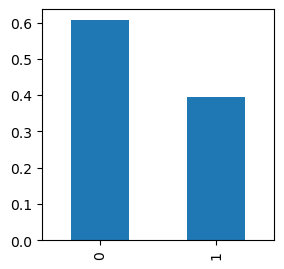

In [10]:
prob_class = class_counts.sort_index()/len(data['Class'])
print("La probabilitá di osservare un campione di tipo no-Spam é: ", round(prob_class[0]*100), '%')
print("La probabilitá di osservare un campione di tipo Spam é: ", round(prob_class[1]*100), '%')
prob_class.plot.bar(figsize=(3,3))
plt.show()

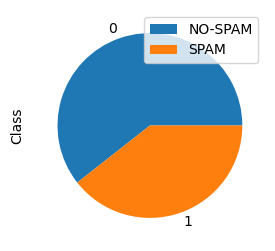

In [11]:
prob_class.plot.pie(figsize=(3,3))
plt.legend(['NO-SPAM','SPAM'])
plt.show()

We can notice that **the two classes are not balanced**. The number of observations or **the probability of finding a No-Spam type item is greater than SPAM (almost double)**. This could cause problems in training a classifier that would have high accuracy but in reality does not discriminate class 1 (SPAM) well. So in the future, I will definitely have to adopt dataset balancing techniques.

In [12]:
#obtain the attribute names
import numpy as np
words_fr_names = list(data.iloc[:,0:-1].columns)

I reduce the dataframe sparsity by converting the elements equal to zero into Nan. So that I will remove them through the dropna() function.

In [13]:
#per each column I want to remove the values equal to 0 
new_df = pd.DataFrame(columns = data.columns)
for el in words_fr_names:
    new_records = data[el].replace({0.0:np.nan})
    new_df[el] = new_records
new_df['Class'] = data['Class']

### CDF (Cumulative Distribution Function)

The shape of the CDF curve gives me information about the frequency distribution of words or characters in the samples. So I want to study whether there are actually words or characters that characterize a class based on the fact that their values distribution in the samples differs with a certain probability.
I want to understand if the two phenomena "SPAM" or "NoSpam" obey to the same probability density, for this purpose I use the CDF which maps a sample value to the relative "quantile order", i.e. the fraction of sample values that are lower or equal to 𝑥.

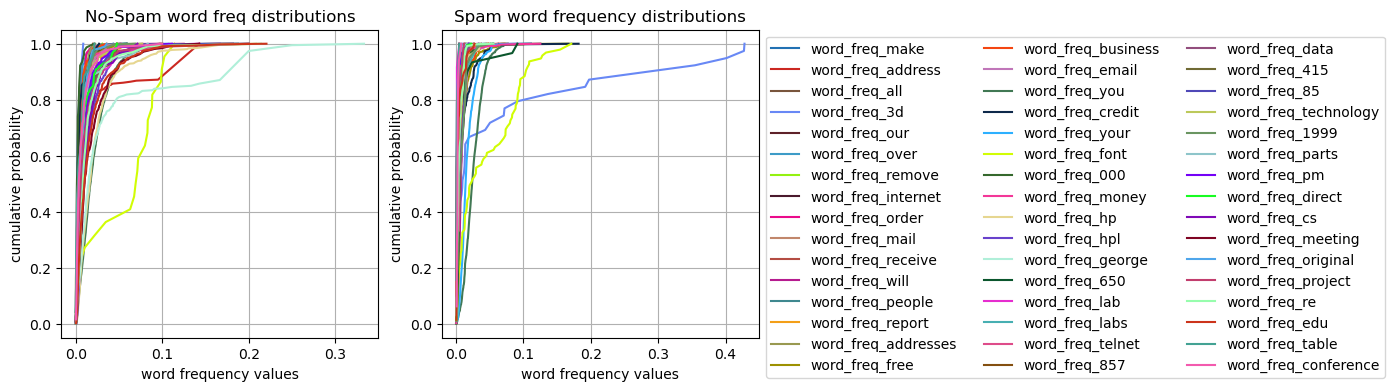

In [14]:
import random
column = new_df.iloc[:,:-10].columns
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.title('No-Spam word freq distributions')
color_map = ['#2271B3', '#CB2821', '#79553D', '#6888F5', '#5E2129', '#3D9BC7', '#93F110', 
             '#4A192C', '#EA0A8B', '#C1876B', '#B44C43', '#B61C8F', '#3F888F', '#F39F18', 
             '#999950', '#9D9101', '#F44611', '#C076B9', '#417854', '#0E294B', '#2DB0FF', 
             '#D1FD04', '#35682D', '#F33798', '#E6D690', '#6842CC', '#B0EFD9', '#0B562D', 
             '#E62DCF', '#47AFB2', '#DE4C8A', '#844F10', '#924E7D', '#706A34', '#4F48B7', 
             '#BCC95A', '#6A9561', '#8EC5CA', '#7401F6', '#17FC22', '#8009B7', '#7F0423', 
             '#4FA6EB', '#C23E6E', '#97FDAD', '#CC341B', '#43A293', '#F35AAE', '#6C6874']

i = 0
for col in column:
    cdf_word_freq = new_df[new_df['Class']==0][col].divide(100).value_counts(normalize=True).sort_index().cumsum()
    plt.plot(cdf_word_freq.index, cdf_word_freq.values, c=color_map[i])
    i+=1

plt.grid()
plt.xlabel('word frequency values')
plt.ylabel('cumulative probability')

plt.subplot(122)
plt.title('Spam word frequency distributions')
i=0
for col in column:
    cdf_word_freq = new_df[new_df['Class']==1][col].divide(100).value_counts(normalize=True).sort_index().cumsum()
    color = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(cdf_word_freq.index, cdf_word_freq.values, c=color_map[i])
    i+=1

plt.legend(column, loc='upper left',bbox_to_anchor=(1., 1., 0., 0.),ncols=3)
plt.xlabel('word frequency values')
plt.ylabel('cumulative probability')
plt.grid()
plt.show()

On the x-axis there are the frequency values for each word which vary from the minimum frequency observed 0 to the maximum frequency observed 0.3 in the no-spam case and 0.4 in the spam case.
Instead on the y-axis there are the cumulative probability where 0 indicates no occurence of the word with the value specified by x while 1 indicates the maximum observed frequency of the word with the frequency value x.

Let's see if there are words that have different frequency ranges between the two classes with different probabilities. For example **"word_freq_george"** that in no-spam presents frequency values greater than 0.3 with a high probability, whereas in spam they remain between 0.0 and 0.1 with a high probability. The same can be said about **word_freq_3d** which in SPAM with a higher probability of 80% presents frequency values increasing from 0.1 to 0.4; while in no SPAM the values remain with high probability at 0.

**This is to say that if an attribute has values distributed differently between the two classes then it can be useful in classification to discriminate between them. If, however, as happens for "font", it has a similar frequency distribution between the two classes then it will not be so relevant for the purposes of the task.**

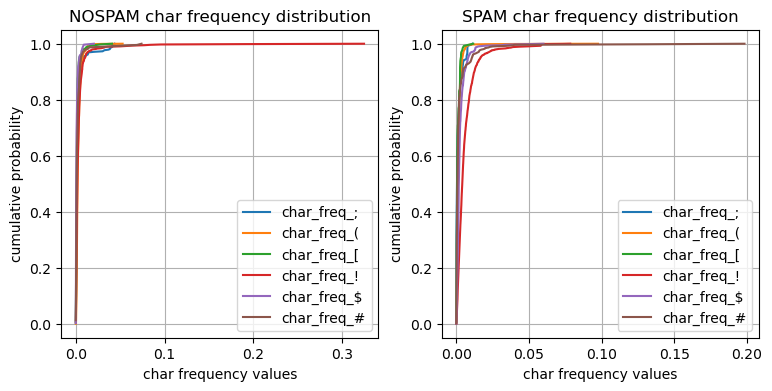

In [15]:
#I do the same thing for the other features
column = new_df.iloc[:,-10:-4].columns
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.title('NOSPAM char frequency distribution')
for col in column:
    cdf_char_freq = new_df[new_df['Class']==0][col].divide(100).value_counts(normalize=True).sort_index().cumsum()
    plt.plot(cdf_char_freq.index, cdf_char_freq.values)
    #plt.plot(cdf_weight_f.index, cdf_weight_f.values)
plt.legend(column)
plt.xlabel('char frequency values')
plt.ylabel('cumulative probability')
plt.grid()

plt.subplot(122)
plt.title('SPAM char frequency distribution')
for col in column:
    cdf_char_freq = new_df[new_df['Class']==1][col].divide(100).value_counts(normalize=True).sort_index().cumsum()
    plt.plot(cdf_char_freq.index, cdf_char_freq.values)
plt.legend(column)
plt.xlabel('char frequency values')
plt.ylabel('cumulative probability')
plt.grid()
plt.show()

Even for the features representing the frequencies of the special characters, the curves are similar therefore the two phenomena obey to a similar probability density function. It is possible to notice that:
- ! is very discriminating as in NOSPAM with high probability it presents higher frequency values of up to 0.3 while in SPAM it presents with high probability a frequency of 0.20.
- the #, $ discriminate more the SPAM class cause with high probability it is possible to observe frequency values in the samples up to 0.20.
- instead the ; and the brackets have almost equal distributions so they don't help discriminate between the two classes.

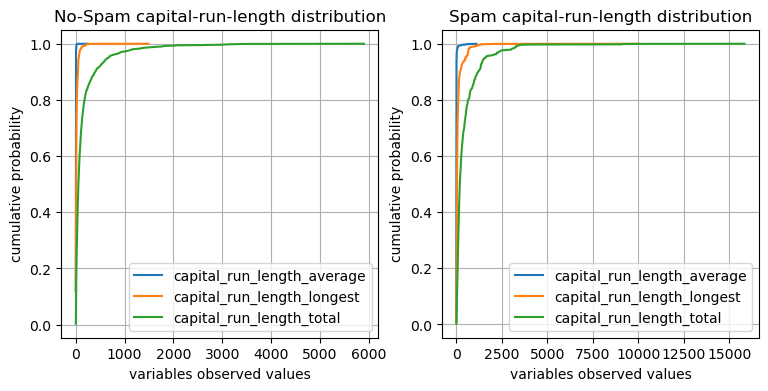

In [16]:
column = new_df.iloc[:,-4:-1].columns
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.title('No-Spam capital-run-length distribution')
for col in column:
    cdf_caplen = new_df[new_df['Class']==0][col].value_counts(normalize=True).sort_index().cumsum()
    plt.plot(cdf_caplen.index, cdf_caplen.values)
    #plt.plot(cdf_weight_f.index, cdf_weight_f.values)
plt.legend(column)
plt.xlabel('variables observed values')
plt.ylabel('cumulative probability')
plt.grid()

plt.subplot(122)
plt.title('Spam capital-run-length distribution')
for col in column:
    cdf_caplen = new_df[new_df['Class']==1][col].value_counts(normalize=True).sort_index().cumsum()
    plt.plot(cdf_caplen.index, cdf_caplen.values)
plt.legend(column)
plt.xlabel('variables observed values')
plt.ylabel('cumulative probability')
plt.grid()
plt.show()

Instead, for the attributes concerning uninterrupted sequences of uppercase characters, we see that the email samples in SPAM present a distribution of values for these attributes in a much wider range and that with maximum probability they present values greater than 7500.

#### Average
Firstly I divided the dataset samples based on whether they belong to the SPAM or No-SPAM class and then I calculated the average for each attribute on these.
I then displayed the values obtained through bar graphs (a verical bar of different color for each class), in particular I generated a separate histogram for each different cluster type of attributes as their values have different meanings and ranges.

In [17]:
mean_new_df = new_df.groupby('Class').mean()

I calculated and plotted the average values of each word frequencies in the two types of emails.

In [18]:
mean_word_fr_df = mean_new_df.iloc[:,0:-9]
nospam_mean_word = mean_word_fr_df.loc[0]
spam_mean_word = mean_word_fr_df.loc[1]

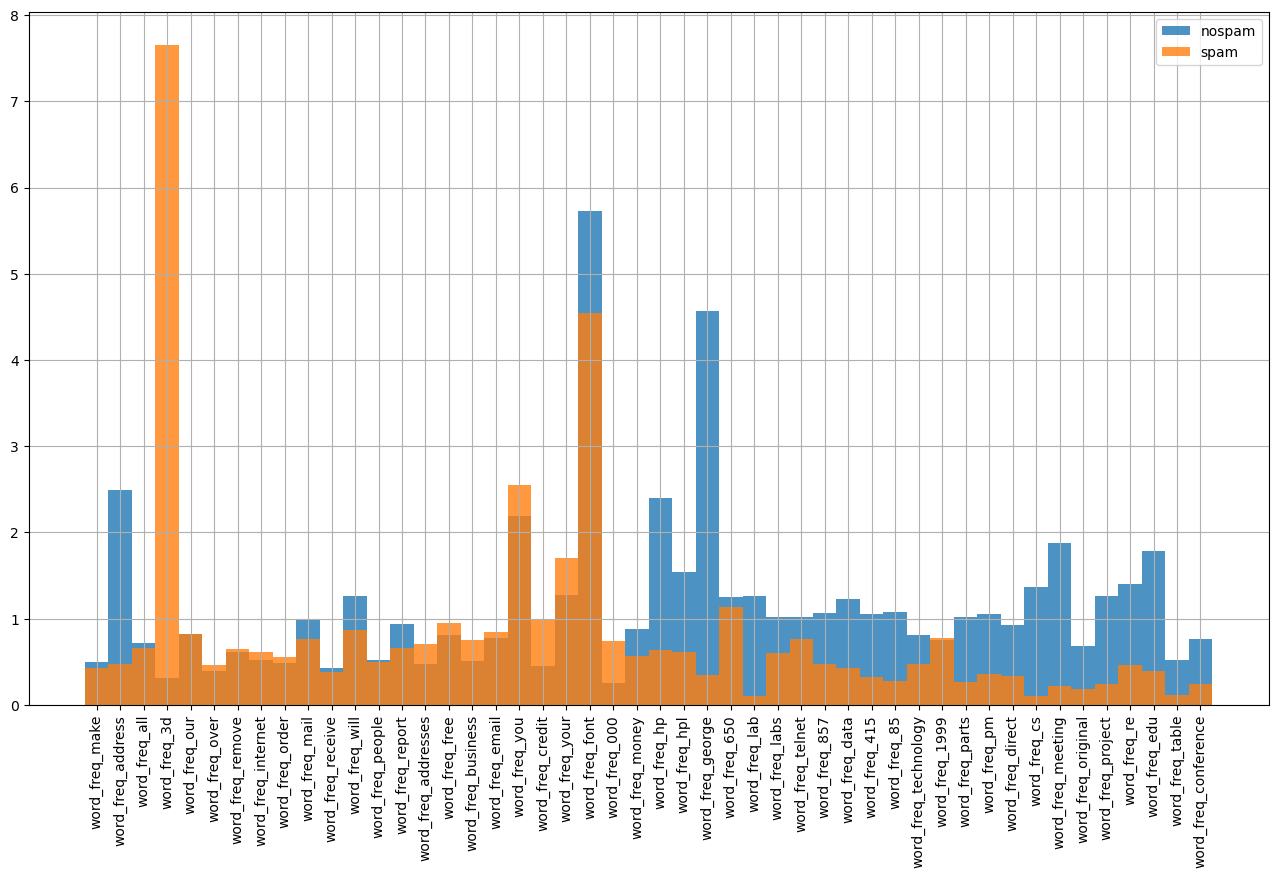

In [19]:
plt.figure(figsize=(16,9))
plt.bar(nospam_mean_word.index, nospam_mean_word.values, width=1, alpha=0.8)
plt.bar(spam_mean_word.index, spam_mean_word.values, width=1, alpha=0.8)
plt.xticks(rotation='vertical')
plt.legend(['nospam', 'spam'])
plt.grid()
plt.show()

This first graph compares the average values of words frequencies contained in spam and non-spam emails. As you can see, there are some **words** that are **on average frequently present** in **SPAM** emails (orange) such as **"3d", "you"**, while others are mostly most present in **nospam (blue)** type emails such as **"hp", "address", "font" or "george"**. From this it is possible to understand that the frequency of some words can be key in the classification.

Subsequently I did the same thing but with the frequencies relating to some special characters. In fact, no-spam emails usually have a notable presence of this feature.

In [20]:
#I calculated and plotted the average values of some special characters frequencies.
mean_char_fr_df = mean_new_df.iloc[:,48:-3]
nospam_mean_char = mean_char_fr_df.loc[0]
spam_mean_char = mean_char_fr_df.loc[1]

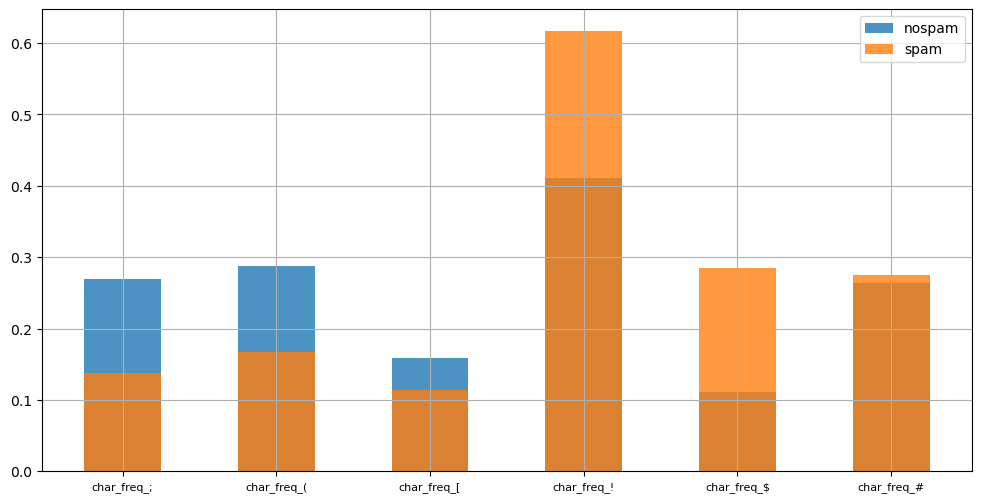

In [21]:
plt.figure(figsize=(12,6))
plt.bar(nospam_mean_char.index, nospam_mean_char.values, width=0.5, alpha=0.8)
plt.bar(spam_mean_char.index, spam_mean_char.values, width=0.5, alpha=0.8)
plt.xticks(fontsize=8)
plt.legend(['nospam', 'spam'])
plt.grid()
plt.show()

It is immediately visible from the graph above that some special characters are particularly present in SPAM such as '!', '$' and '#'. These can be decisive in identifying a spam email from a nospam one. Other special characters such as '[', '(', and ';' are much more present in nospam emails and therefore can be useful in distinguishing this type of email.

Finally, the last category of attributes refers to the uninterrupted sequences of uppercase characters which we can consider crucial in recognizing a spam email as can also be seen in the bar graph below. In fact, the average value calculated on these three attributes for the SPAM category is significantly higher than those calculated on NOSPAM.

In [22]:
mean_capital_df = mean_new_df.iloc[:,-3::]
nospam_mean_cap = mean_capital_df.loc[0]
spam_mean_cap = mean_capital_df.loc[1]

In [23]:
mean_capital_df

,capital_run_length_average,capital_run_length_longest,capital_run_length_total
Class,,,
0,2.377301,18.214491,161.470947
1,9.519165,104.393271,470.619415


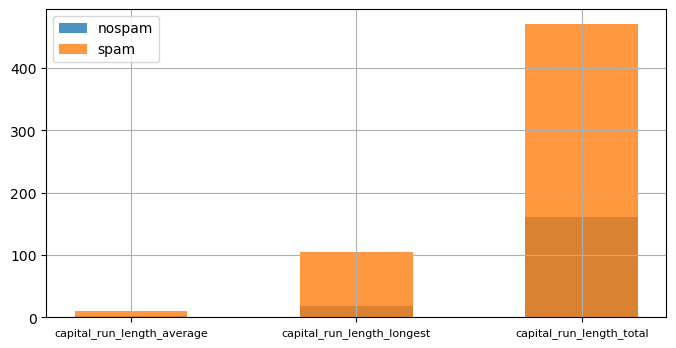

In [24]:
plt.figure(figsize=(8,4))
plt.bar(nospam_mean_cap.index, nospam_mean_cap.values, width=0.5, alpha=0.8)
plt.bar(spam_mean_cap.index, spam_mean_cap.values, width=0.5, alpha=0.8)
plt.xticks(fontsize=8)
plt.legend(['nospam', 'spam'])
plt.grid()
plt.show()


#### Gaussian Fitting
The data can be described "finding" the distribution which they belongs to. This is obtained 
I dati possono essere descritti "trovando" la distribuzione alla quale essi appartengono. This is achieved by "fitting" the distribution to the data, i.e. by finding appropriate values of the distribution parameters that ensure that the distribution "explains" well the data. This procedure occurs in two steps:

- Identify a distribution function that better explains the phenomenon, in this case the **gaussian**;
- Fit the distribution to the data.

According to the central limit theorem, the sum of a large number of **independent and identically distributed** random variables is **approximately Gaussian**, regardless of the probability distribution followed by the individual variables.

The analytical form of the Gaussian distribution is the following:

\begin{equation}
G(x;\mu,\sigma^2)={\frac  {1}{\sigma {\sqrt  {2\pi }}}}\;e^{{-{\frac  {\left(x-\mu \right)^{2}}{2\sigma ^{2}}}}}~{\mbox{ con }}~x\in {\mathbb  {R}}
\end{equation}

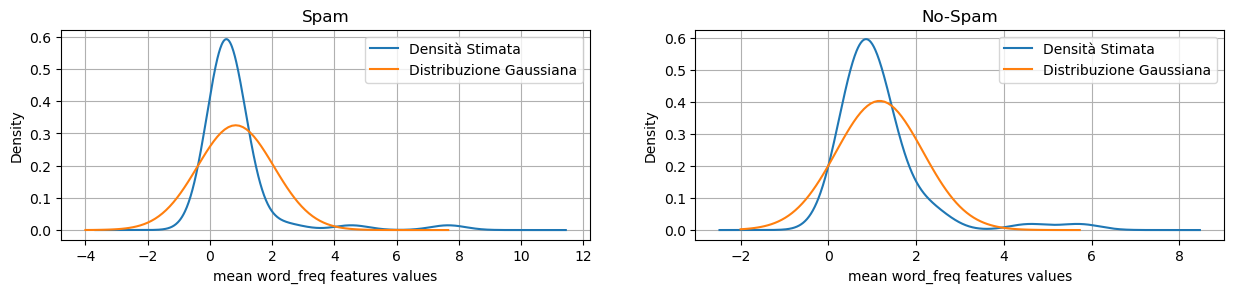

In [25]:
from scipy.stats import norm
spam_mu = spam_mean_word.mean()
spam_sigma = spam_mean_word.std()
nospam_mu = nospam_mean_word.mean()
nospam_sigma = nospam_mean_word.std()

spam_g = norm(spam_mu,spam_sigma)
nospam_g = norm(nospam_mu, nospam_sigma)
spam_x=np.linspace(-4,spam_mean_word.max(),100) #gassian values
nospam_x = np.linspace(-2,nospam_mean_word.max(),100) #gassian values

plt.figure(figsize=(15,6))
plt.subplot(221)

spam_mean_word.plot.density() #Generate Kernel Density Estimate plot using Gaussian kernels.
plt.plot(spam_x,spam_g.pdf(spam_x)) #real gaussian
plt.grid()
plt.title('Spam')
plt.xlabel('mean word_freq features values')
plt.legend(['Densità Stimata','Distribuzione Gaussiana'])

plt.subplot(222)

nospam_mean_word.plot.density()
plt.plot(nospam_x,nospam_g.pdf(nospam_x))
plt.grid()
plt.title('No-Spam')
plt.xlabel('mean word_freq features values')
plt.legend(['Densità Stimata','Distribuzione Gaussiana'])

plt.show()

**pandas.plot.density()**, plots the density using a smoothing kernel (Gaussian in my case) while plotting the values.
The horizontal axis represents the range of values observed. In my case, the averages of the respective features.
The vertical axis represents the estimated probability density. This indicates the relative likelihood of observing a particular value. Higher density indicates a higher probability of observing that value.
It quantifies how well the model or hypothesis explains the observed data.

As can be seen from the graphs above, the average frequencies for each attribute are approximated by Gaussians. Compared to the reference one, the curves describing the data are sharper (leptokurtic). Furthermore, the Gaussians of the data are more distributed towards the left than the uniform ones **(positive skewness)**.
Furthermore, for both classes the values are more widely distributed between 0 and 2.

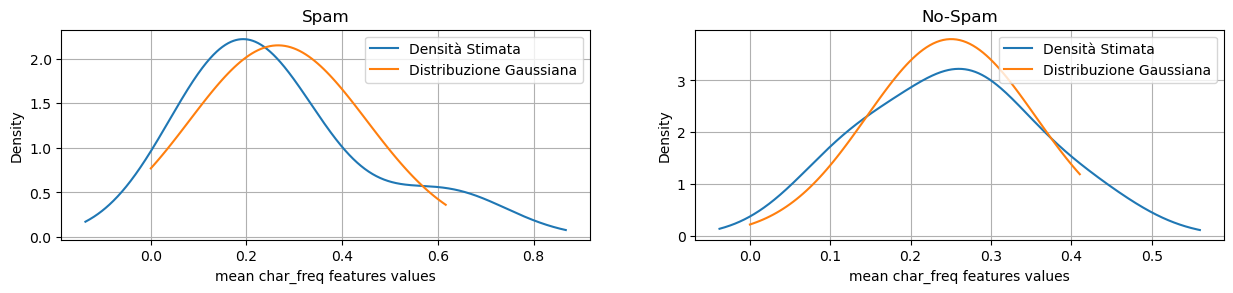

In [26]:
from scipy.stats import norm
spam_mu = spam_mean_char.mean()
spam_sigma = spam_mean_char.std()
nospam_mu = nospam_mean_char.mean()
nospam_sigma = nospam_mean_char.std()

spam_g = norm(spam_mu,spam_sigma)
nospam_g = norm(nospam_mu, nospam_sigma)
spam_x=np.linspace(0,spam_mean_char.max(), 100)
nospam_x = np.linspace(0,nospam_mean_char.max(),100)

plt.figure(figsize=(15,6))
plt.subplot(221)
spam_mean_char.plot.density()
plt.plot(spam_x,spam_g.pdf(spam_x))
plt.grid()
plt.title('Spam')
plt.xlabel('mean char_freq features values')
plt.legend(['Densità Stimata','Distribuzione Gaussiana'])

plt.subplot(222)
nospam_mean_char.plot.density()
plt.plot(nospam_x,nospam_g.pdf(nospam_x))
plt.grid()

plt.title('No-Spam')
plt.xlabel('mean char_freq features values')
plt.legend(['Densità Stimata','Distribuzione Gaussiana'], loc='upper right')

plt.show()

The density curve of the average of the character frequencies is also described by a Gaussian and compared to the uniform one the one estimated on the data has a positive skew.
In the SPAM class the peak for the average frequency value is at 0.2, most of the features have an average frequency of 0.2. However, in the no spam class it is slightly higher.

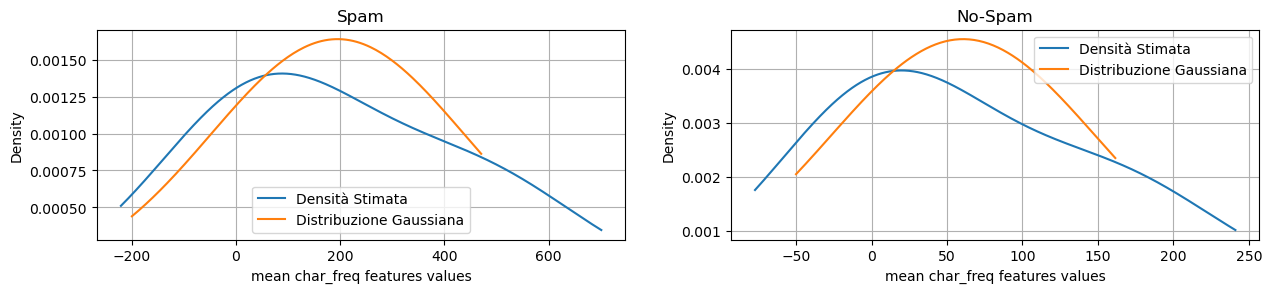

In [27]:
from scipy.stats import norm
spam_mu = spam_mean_cap.mean()
spam_sigma = spam_mean_cap.std()
nospam_mu = nospam_mean_cap.mean()
nospam_sigma = nospam_mean_cap.std()

spam_g = norm(spam_mu,spam_sigma)
nospam_g = norm(nospam_mu, nospam_sigma)
spam_x=np.linspace(-200,spam_mean_cap.max(),200)
nospam_x = np.linspace(-50,nospam_mean_cap.max(),200)

plt.figure(figsize=(15,6))
plt.subplot(221)
spam_mean_cap.plot.density()
plt.plot(spam_x,spam_g.pdf(spam_x))
plt.grid()
plt.title('Spam')
plt.xlabel('mean char_freq features values')
plt.legend(['Densità Stimata','Distribuzione Gaussiana'])

plt.subplot(222)
nospam_mean_cap.plot.density()
plt.plot(nospam_x,nospam_g.pdf(nospam_x))
plt.grid()
plt.title('No-Spam')
plt.xlabel('mean char_freq features values')
plt.legend(['Densità Stimata','Distribuzione Gaussiana'], loc='upper right')

plt.show()

Compared to the Gaussian curves in this case, those of the averages relating to the last three attributes are much further shifted to the left and always present positive asymmetry or skewness.

#### Variability Analysis - IQR
The **variability** is indication of greater information, so I expect that attributes that have a higher var are very expressive as they are giving us additional information compared to those that have low variability.

The interquartile range shows the distribution of the central half of my data, it demonstrates that some features present a value significantly greater of this index for the class they characterize. Furthermore **given the large presence of outliers (previously demonstrated) the IQR gives me a much more robust measurement as it is less sensitive to these off-scale values than the variance and standard deviation.**
In fact, as the table shows, the iqr values for the spam class of "address" or "3d" (most frequent attributes for spam) are higher than those of the nospam class. Same thing for the attributes of the sequences of uppercase characters and for those indicating the frequency of the characters.

In [34]:
columns = new_df.iloc[:, :-1].columns
spam_iqr = []
nospam_iqr = []
for col in columns:
    q11,q13 = new_df[new_df['Class']==1][col].quantile([1/4,3/4])
    q21,q23 = new_df[new_df['Class']==0][col].quantile([1/4,3/4])
    spam_iqr.append(q13-q11)
    nospam_iqr.append(q23-q21)
data = [nospam_iqr, spam_iqr]
iqr_df = pd.DataFrame(data, columns=columns, index=["nospam", "spam"])
iqr_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
nospam,0.56,1.36,0.68,0.2325,0.6775,0.38,0.455,0.42,0.5075,0.935,...,0.7450,0.15,0.24675,0.104,0.297,0.0975,0.164,1.171,14.0,122.25
spam,0.42,0.37,0.49,6.6950,0.7700,0.45,0.710,0.48,0.5150,0.695,...,0.1125,0.16,0.13300,0.128,0.556,0.2030,0.131,3.384,69.0,437.00


**Outliers removal**
Finally I decided to keep outliers cause they codify important information.

In [35]:
import math
def remove_outliers(data_df, columns_name):
    for col in columns_name:
        q11,q13 = data_df[col].quantile([1/4,3/4])
        intr_qr = q13-q11
              
        upper = q13+(1.5*intr_qr)
        lower = q11-(1.5*intr_qr)
        for x in data_df[col]:
            if(not math.isnan(x)): 
                if(x < lower): data_df[data_df[col] < lower] = np.nan
                elif(x > upper): data_df[data_df[col] > upper] = np.nan

In [36]:
#remove_outliers(new_df, new_df.columns)

### Variables correlation
The correlation between two variables indicates whether these two are independent (not correlated) and therefore do not influence each other or whether when the values of one vary, those of the other also change with a certain regularity.
For the purposes of classification into the two classes, it is important to understand which features can help in discriminating  the two cases.

**Since all the features have many outliers I decided to use Spearman as a correlation measure**.

The Spearman rank correlation index tries to overcome this problem by sorting all the values and replacing them with their rank, i.e. the position they occupy in the ordered list. At this point, the Pearson index is calculated on the ranks.
The Spearman index is always a number between -1 (indicating a perfect negative relationship between the ranks) and + 1 (indicating a perfect positive relationship between the ranks). A value of 0 indicates that there is no relationship between the ranks. 

Therefore, **the closer the index is to zero, the weaker the relationship will be, the closer it is to -1 or + 1 the stronger the relationship will be.**

Correlation is used as a method for selecting features and is usually **calculated between the features and the output class**. This roughly translates how small changes in the current feature are reflected in the output classes. If the correlation is strong then we keep the features to classify the class, otherwise not.

I studied the correlation by plotting the heatmap for the Spearman correlation coefficient.

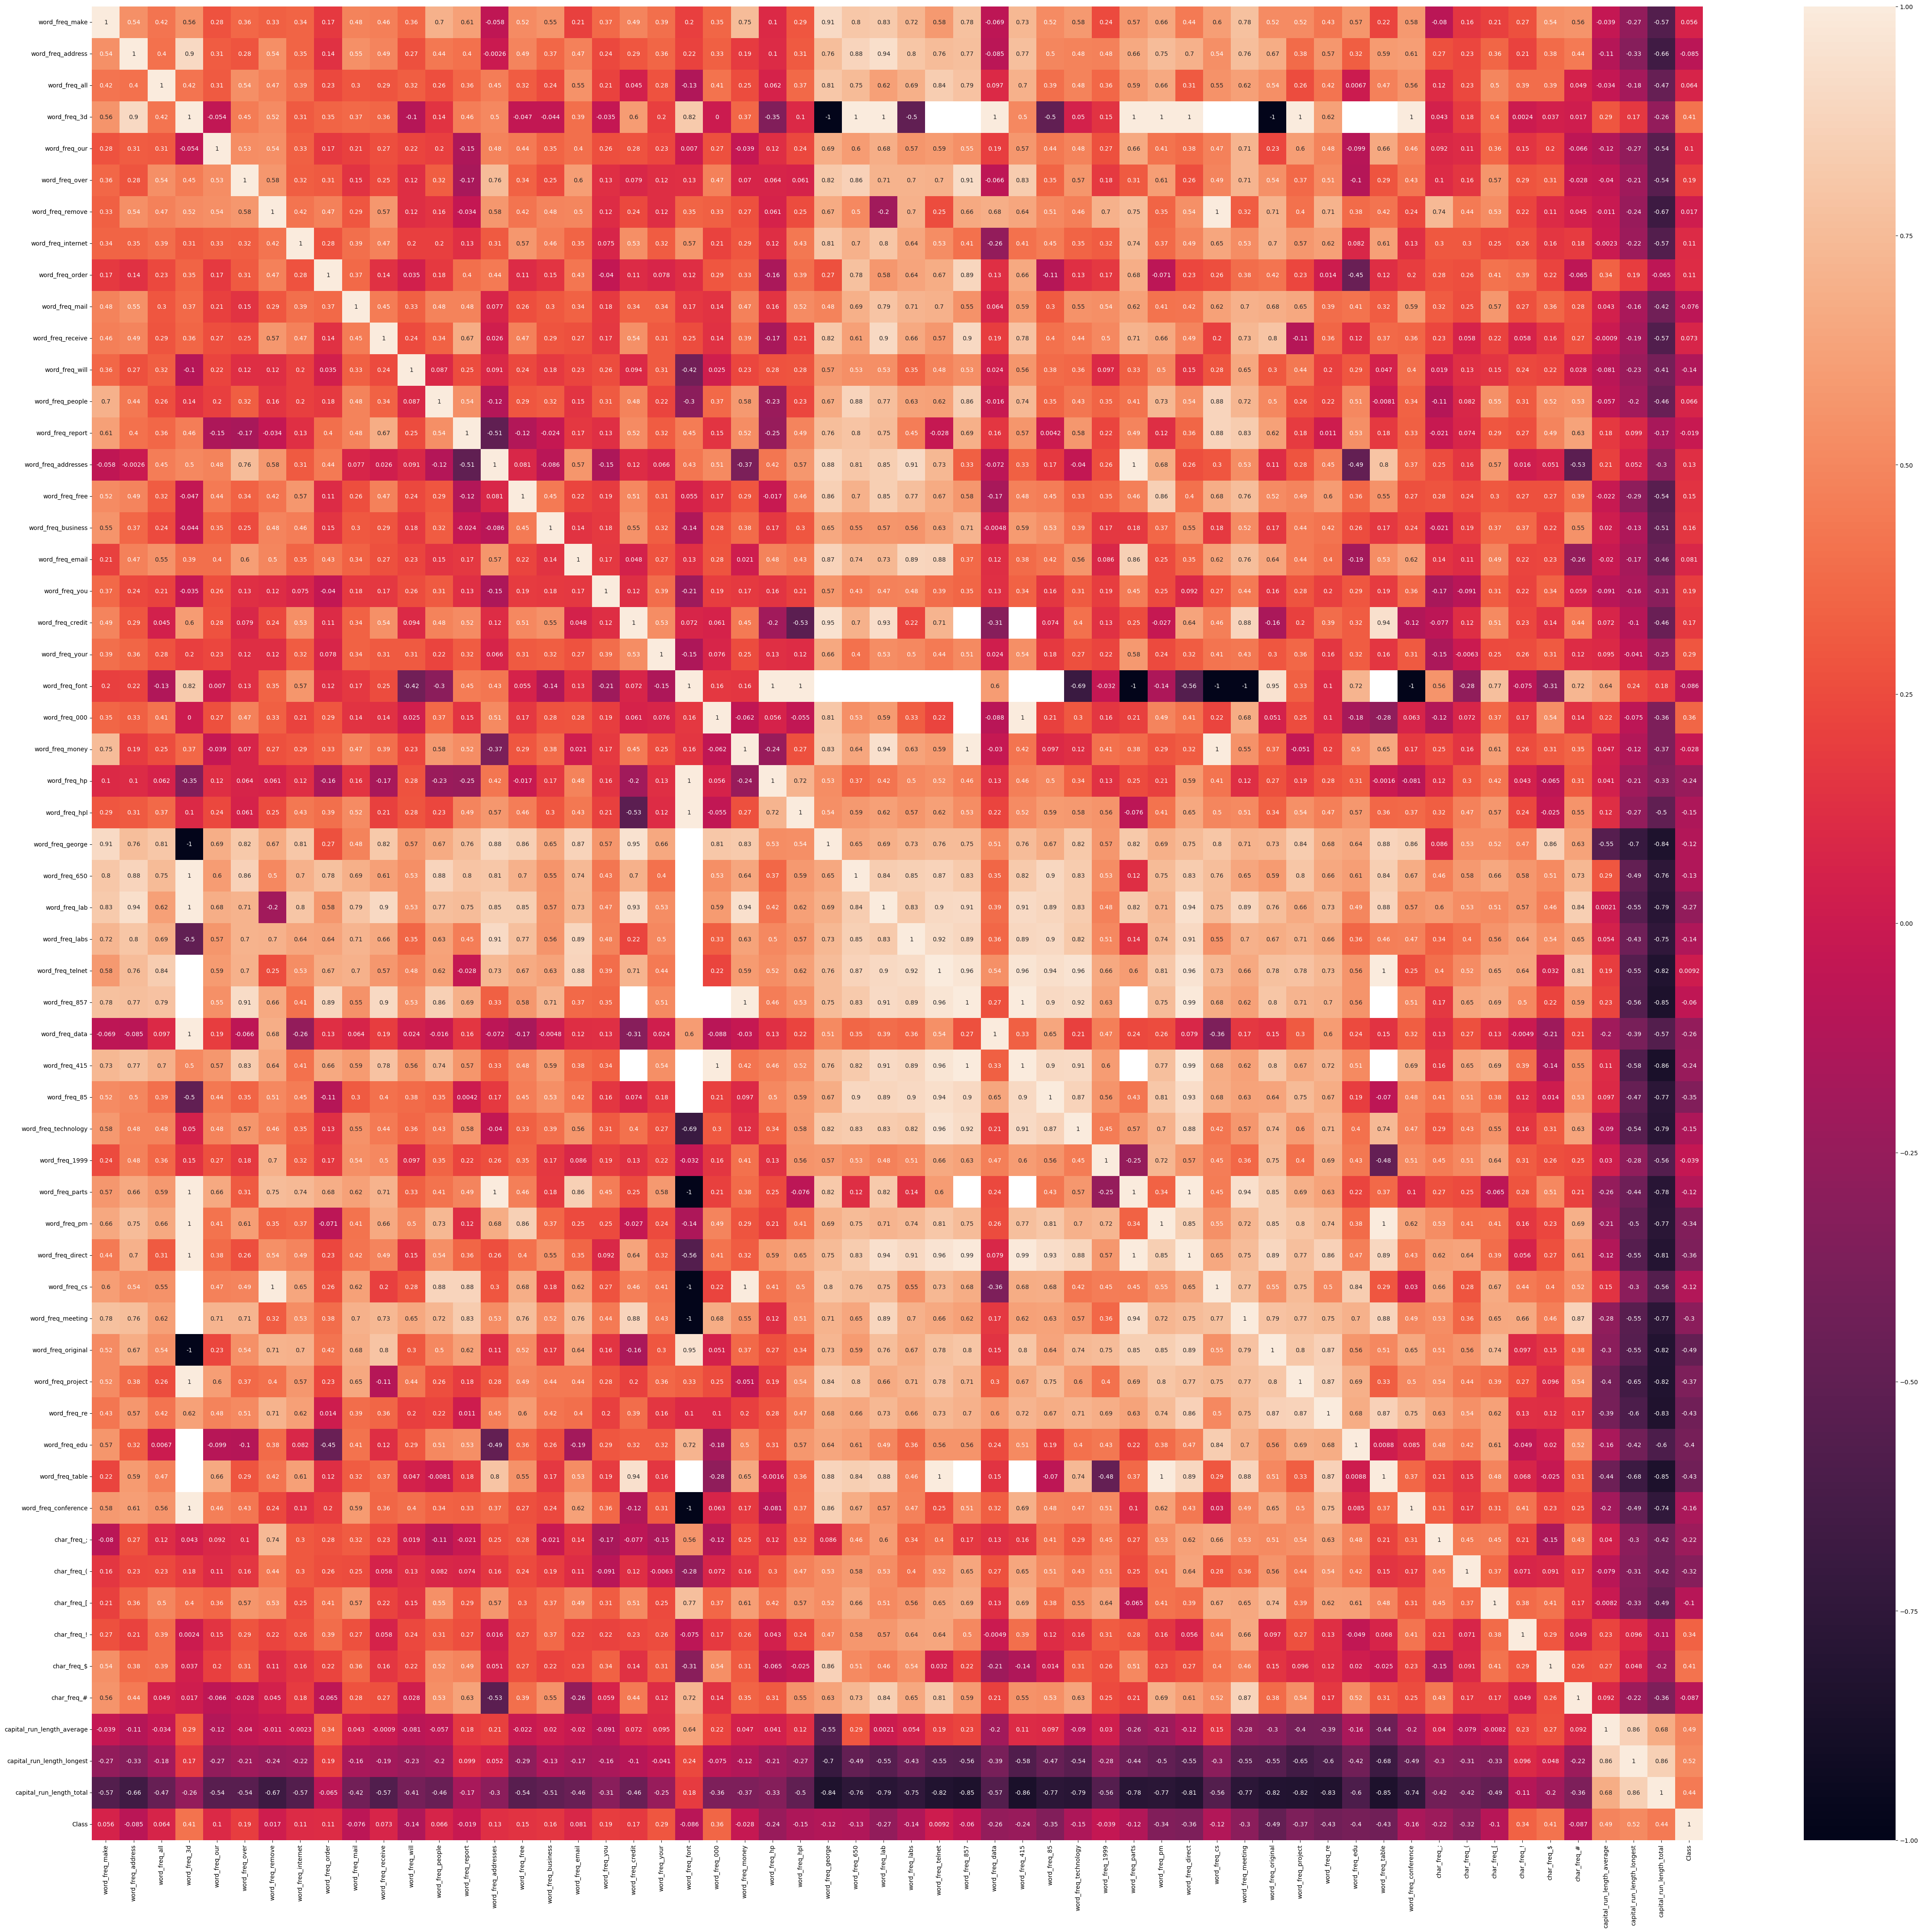

In [37]:
import seaborn as sns
mask = np.zeros_like(new_df.corr(method='spearman'))
mask[np.triu_indices_from(mask)] = True

plt.rcParams.update({'figure.figsize':(60,55), 'figure.dpi':100})
prova = sns.heatmap(new_df.corr(method='spearman'), annot=True)
plt.show()

In the heatmap the values goes from black which indicates a strong negative correlation -1 to very light yellow which indicates a strong positive correlation. The values in red are those with correlation equal to 0 (not correlated).
From the last column, we can see  the correlation of the class with respect to the other features in particular 'Class' has:
- **Strong positive correlation** with the attributes "capital_run_length_average", "capital_run_length_total", and "capital_run_length_longest" which are actually a defining characteristic of spam. 
- **Moderate positive correlation** with the features: "word_freq_3d", "word_freq_your", "word_freq_000", "char_freq_!" and "char_freq_$".
- **Strong negative correlation** with: "char_freq_(", "word_freq_table", "word_freq_edu", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_direct", "word_freq_pm", "word_freq_85".
- **Moderate negative correlation** with: "word_freq_data", "word_freq_hp", "char_freq_;", "word_freq_conference", "word_freq_415", "word_freq_george".

**It can be noted that the attributes that mostly identify the positive SPAM class have a positive correlation with the class attribute, while those that mostly identify the negative No-SPam class have a negative correlation with 'Class'.**
According to this analysis, we should therefore keep the features that present strong negative and positive correlations for classification.

The attributes **"capital_run_length_average", "capital_run_length_total", and "capital_run_length_longest"** have **strong positive correlation** between each other.

The features ranging from **"word_freq_george" up to "word_freq_re"** which all indicate terms that are most frequently found in NO-SPAM emails all have **strong positive correlation** between them except for a few cases.

Subsequently we can notice that the two attributes **"word_freq_3d" and "word_freq_george"** have **very strong negative correlation** this is because they are the attributes that represent the two opposite classes more than the other words.

The "capital_run_length_total" features presents a strong negative correlation with the features ranging from "word_freq_george" to "word_freq_conference", in general **all three "capital_run_length" attributes** present **strong or weak negative correlation with the other features* *.

In [38]:
#per each column I remove the Nan values
words_fr_names = new_df.iloc[:,:-1].columns
feat_df = pd.DataFrame(columns = new_df.columns)
for el in words_fr_names:
    new_records = new_df[el].replace({np.nan:0.0})
    feat_df[el] = new_records
feat_df['Class'] = new_df['Class']

## 5: Classification Task
### 1: Logistic Regression 
In my case the dependent variable is binary categorical (0: nospam, 1:spam) so to study it with respect to the other features I cannot use linear regression but logistic one.

Given the large number of features, I study the relationship between the dependent variable 'Class' with all the other independent variables, eliminating the less significant ones from time to time through **backward elimination**.
In this way I verify both that the spearman correlation has actually detected the right strong correlation relationships to regress the class, and I re-calculate the logistic regression only on the most significant features, reducing the size of the problem.

Among all the values shown in output, some important ones are:
 * **Pseudo R-squared** tells us how much the linear model "explains" the values of the dependent variable, given the values of the independent variables. A low value of $R^2$ indicates an uninformative linear model. A high value of $R^2$ indicates that the linear model predicts the values of $Y$ significantly better. An intermediate $R^2$ value (e.g. $0.5$) tells us that the linear model still manages to provide added value, even if the model may not be perfect;
 
 * **LLR p-value**: is the p-value calculated from a "Likelihood-ratio test". If the p-value is below a critical threshold, (e.g. 0.05), the logistic regressor is statistically significant;
 
 * **Valori $t$ dei singoli parametri** and related values of $P>|t|$, indicate the statistics of a student t-test which aims to reject the null hypothesis that the parameter in question belongs to a distribution of zero average. If this hypothesis were verified. A p-value below the chosen significance level (e.g. 0.05) indicates that the variable under consideration contributes significantly to the regression.

Firstly I computed the logistic regression over all the variables and on the balanced dataset. Splitting the dataset into 75% for training and 25% for test. 

In [39]:
#renaming the attributes that refers to special characters cause generate errors
feat_df.rename(columns = {'char_freq_;':'char_freq_pv','char_freq_(':'char_freq_tonda', 'char_freq_[':'char_freq_quad', 'char_freq_!':'char_freq_escl','char_freq_#':'char_freq_canc','char_freq_$':'char_freq_dollar'}, inplace = True)

Dataset split in 75% training and 25% control set.

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(1234)
email_train, email_test = train_test_split(feat_df, test_size=0.25)
print(len(email_train))
print(len(email_test))

3450
1151


In [41]:
from statsmodels.formula.api import logit
#logistic regression on all the features
model = logit('Class ~ word_freq_make + word_freq_address + word_freq_all + word_freq_3d + word_freq_our + word_freq_over + word_freq_remove + word_freq_internet + word_freq_order + word_freq_mail + word_freq_receive + word_freq_will + word_freq_people + word_freq_report + word_freq_addresses + word_freq_free + word_freq_business + word_freq_email + word_freq_you + word_freq_credit + word_freq_your + word_freq_font + word_freq_000 + word_freq_money + word_freq_hp + word_freq_hpl + word_freq_george+word_freq_650 + word_freq_lab + word_freq_labs + word_freq_telnet + word_freq_857 + word_freq_data + word_freq_415 + word_freq_85 + word_freq_technology + word_freq_1999 + word_freq_parts + word_freq_pm + word_freq_direct + word_freq_cs + word_freq_meeting + word_freq_original + word_freq_project + word_freq_re + word_freq_edu + word_freq_table + word_freq_conference + char_freq_pv + char_freq_tonda + char_freq_quad + char_freq_escl + char_freq_dollar + char_freq_canc + capital_run_length_average + capital_run_length_total + capital_run_length_longest',email_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.196043
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                 3450
Model:                          Logit   Df Residuals:                     3392
Method:                           MLE   Df Model:                           57
Date:                Tue, 11 Jul 2023   Pseudo R-squ.:                  0.7077
Time:                        13:08:35   Log-Likelihood:                -676.35
converged:                       True   LL-Null:                       -2314.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.5938      0.163     -9.801      0.000      -1.913      -1.275
word_freq_make                -0.2232      0.265     -0.842      0.400      -0.743       0.296
word_freq_address             -0.1459      0.081     -1.799      0.072      -0.305       0.013
word_freq_all                  0.0952      0.129      0.736      0.462      -0.158       0.349
word_freq_3d                   2.0543      1.467      1.401      0.161      -0.820       4.929
word_freq_our                  0.7644      0.133      5.737      0.000       0.503       1.026
word_freq_over                 0.6669      0.259      2.574      0.010       0.159       1.175
word_freq_remove               2.4742      0.405      6.102      0.000       1.679       3.269
word_freq_internet             0.4955      0.185      2.681      0.007       0.133       0.858
word_freq_order                0.6668      0.334      1.995      0.046       0.012       1.322
word_freq_mail                 0.0679      0.076      0.900      0.368      -0.080       0.216
word_freq_receive             -0.3230      0.357     -0.905      0.365      -1.022       0.376
word_freq_will                -0.1552      0.089     -1.745      0.081      -0.330       0.019
word_freq_people              -0.1833      0.257     -0.712      0.477      -0.688       0.321
word_freq_report               0.1494      0.159      0.942      0.346      -0.162       0.460
word_freq_addresses            1.0149      0.714      1.421      0.155      -0.385       2.415
word_freq_free                 0.9714      0.163      5.945      0.000       0.651       1.292
word_freq_business             1.0781      0.265      4.066      0.000       0.558       1.598
word_freq_email                0.0760      0.134      0.567      0.571      -0.187       0.339
word_freq_you                  0.0693      0.042      1.658      0.097      -0.013       0.151
word_freq_credit               1.4823      0.838      1.769      0.077      -0.160       3.124
word_freq_your                 0.2310      0.061      3.775      0.000       0.111       0.351
word_freq_font                 0.2465      0.200      1.235      0.217      -0.145       0.638
word_freq_000                  2.3136      0.524      4.414      0.000       1.286       3.341
word_freq_money                0.6661      0.261      2.554      0.011       0.155       1.177
word_freq_hp                  -2.3363      0.420     -5.562      0.000      -3.160      -1.513
word_freq_hpl                 -1.0907      0.544     -2.006      0.045      -2.157      -0.025
word_freq_george             -13.5997      2.730     -4.981      0.000     -18.951      -8.248
word_freq_650                  0.5517      0.257      2.148      0.032       0.048       1.055
word_freq_lab                 -3.5402      2.473     -1.432      0.152      -8.387       1.306
word_freq_labs                -0.1032      0.354     -0.291      0.771      -0.798       0.591
word_freq_t

- The model explains well the relationship between the indipendent variables and the dependent variable(Pseudo R-squ.: 0.7077);
- The regressor differs significantly from the null regressor (p-value below the critical threshold 0.05);
- The statistically relevant regressor parameters are word_freq_our, word_freq_over, word_freq_remove, word_freq_free, word_freq_business, word_freq_your, word_freq_000, word_freq_money, word_freq_hp, word_freq_george, word_freq_re, word_freq_edu, char_freq_!, char_freq_dollar, capital_run_length_total. All other p-values are above the 0.05 threshold so the associated regressor parameters are not statistically significant.

Now I try to balance the dataset and re-compute the logistic regression to see if there are improvements.

### Undersampling
The undersampling method consists in reducing the majority class, keeping only a part of its records. Generally, some observations are randomly dropped from the majority class to balance the number of records with the minority class.
Undersampling is not recommended when the minority class is too small since in my case it counts as 1813 then it's fine.

In [42]:
u_data = feat_df[feat_df['Class']==1].copy() #create a dataset with the data of the minority class

#add to the dataset a number of record (randomly choosen) of the majority class equal to the number of elements of the minority one.
u_data = pd.concat([u_data, feat_df[feat_df['Class']==0].sample(n=len(feat_df[feat_df['Class']==1])).copy()])

In [43]:
print(u_data.Class.value_counts())

1    1813
0    1813
Name: Class, dtype: int64


[Text(0, 0, 'nospam'), Text(1, 0, 'spam')]

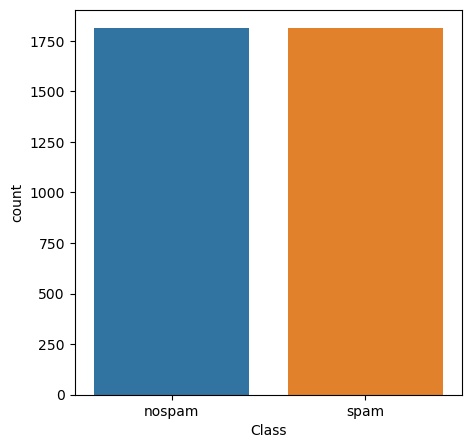

In [44]:
plt.figure(figsize=(5,5))
g = sns.countplot(x="Class", data=u_data)
g.set_xticklabels(['nospam', 'spam'])

I try again to calculate the **logistic regression** on the newly balanced dataset. 
I get a Pseudo-$R^2$ equal to **0.7226** greater than the previous one. **LLR p-value** remains at 0 so the regressor differs significantly from the null regressor. 

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(1234)
email_train, email_test = train_test_split(u_data, test_size=0.25)
print(len(email_train))
print(len(email_test))

2719
907


**Backward Elimination**, given the large number of features I try to see if it is possible to eliminate some that do not contribute significantly to the regression and which can invalidate its calculation.
 
 1. The regressor is calculated considering all the dependent variables;
 2. If all the variables are significant, the regressor found is the final one;
 3. If any variable is not significant, remove the variable with the highest p-value, re-calculate the linear regressor and return to point 2.
 
*Execution:*
- word_freq_report p-value = 0.927 Pseudo-R$^2$ = 0.7226
- word_freq_all p-value = 0.910 Pseudo-R$^2$ = 0.7226
- char_freq_tonda	p-value = 0.698 Pseudo-R$^2$ = 0.7225
- word_freq_telnet p-value = 0.677 Pseudo-R$^2$ = 0.7224
- word_freq_receive p-value = 0.644 Pseudo-R$^2$ = 0.7224
- word_freq_857 p-value = 0.621  Pseudo-R$^2$ = 0.7224
- word_freq_email p-value = 0.597  Pseudo-R$^2$ = 0.7224
- word_freq_1999 p-value = 0.578  Pseudo-R$^2$ = 0.7222
- word_freq_labs p-value = 0.577  Pseudo-R$^2$ = 0.7220
- capital_run_length_average p-value = 0.507 Pseudo-R$^2$ =  0.7219
- word_freq_font p-value = 0.453 Pseudo-R$^2$ =  0.7217 
- word_freq_mail p-value = 0.424 Pseudo-R$^2$ = 0.7215
- word_freq_3d p-value = 0.359 Pseudo-R$^2$ = 0.7204
- char_freq_quad p-value = 0.321 Pseudo-R$^2$ = 0.7198
- word_freq_table p-value = 0.309 Pseudo-R$^2$ = 0.7193
- word_freq_original p-value = 0.300 Pseudo-R$^2$ = 0.7187
- word_freq_direct p-value = 0.283 Pseudo-R$^2$ = 0.7182
- char_freq_canc p-value = 0.278 Pseudo-R$^2$ = 0.7162
- word_freq_lab p-value = 0.271 Pseudo-R$^2$ = 0.7154
- word_freq_85 p-value = 0.258 Pseudo-R$^2$ = 0.7146
- word_freq_credit p-value = 0.215 Pseudo-R$^2$ = 0.7124
- word_freq_make p-value = 0.183 Pseudo-R$^2$ = 0.7120
- word_freq_415 p-value = 0.168 Pseudo-R$^2$ = 0.7116
- word_freq_people p-value = 0.146 Pseudo-R$^2$ = 0.7108
- word_freq_parts p-value = 0.126 Pseudo-R$^2$ = 0.7093
- word_freq_pm p-value = 0.122 Pseudo-R$^2$ = 0.7179
- word_freq_will p-value = 0.093 Pseudo-R$^2$ = 0.7067
- word_freq_cs p-value = 0.071 Pseudo-R$^2$ = 0.7002
- word_freq_address p-value = 0.066 Pseudo-R$^2$ = 0.6981
 
At the end, I removed **29 features** that were not significant and therefore I get a regressor where all variables are significant $p-value<=0.05$. Pseudo-$R^2$ remains high at **0.6981**.

In [46]:
from statsmodels.formula.api import logit
model = logit('Class ~ word_freq_address + word_freq_our + word_freq_over + word_freq_remove + word_freq_internet + word_freq_order + word_freq_free + word_freq_business + word_freq_you + word_freq_your + word_freq_000 + word_freq_money + word_freq_hp + word_freq_hpl + word_freq_george + word_freq_650 + word_freq_data + word_freq_technology + word_freq_meeting + word_freq_project + word_freq_re + word_freq_edu + word_freq_conference + char_freq_pv + char_freq_escl + char_freq_dollar + capital_run_length_total + capital_run_length_longest',email_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.209195
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                 2719
Model:                          Logit   Df Residuals:                     2690
Method:                           MLE   Df Model:                           28
Date:                Tue, 11 Jul 2023   Pseudo R-squ.:                  0.6981
Time:                        13:08:36   Log-Likelihood:                -568.80
converged:                       True   LL-Null:                       -1884.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.3585      0.150     -9.079      0.000      -1.652      -1.065
word_freq_address             -0.1413      0.083     -1.708      0.088      -0.303       0.021
word_freq_our                  0.7039      0.150      4.687      0.000       0.410       0.998
word_freq_over                 0.9940      0.326      3.044      0.002       0.354       1.634
word_freq_remove               2.4927      0.452      5.516      0.000       1.607       3.379
word_freq_internet             0.6369      0.217      2.941      0.003       0.212       1.061
word_freq_order                0.8866      0.374      2.372      0.018       0.154       1.619
word_freq_free                 1.1912      0.203      5.878      0.000       0.794       1.588
word_freq_business             0.8290      0.256      3.236      0.001       0.327       1.331
word_freq_you                  0.0999      0.045      2.230      0.026       0.012       0.188
word_freq_your                 0.2110      0.070      3.027      0.002       0.074       0.348
word_freq_000                  2.5674      0.738      3.481      0.000       1.122       4.013
word_freq_money                1.3078      0.420      3.111      0.002       0.484       2.132
word_freq_hp                  -1.8760      0.333     -5.639      0.000      -2.528      -1.224
word_freq_hpl                 -1.6783      0.540     -3.107      0.002      -2.737      -0.619
word_freq_george              -6.4505      1.724     -3.742      0.000      -9.829      -3.072
word_freq_650                  0.7733      0.330      2.344      0.019       0.127       1.420
word_freq_data                -0.9439      0.367     -2.571      0.010      -1.663      -0.224
word_freq_technology           0.8130      0.353      2.306      0.021       0.122       1.504
word_freq_meeting             -3.6204      1.080     -3.351      0.001      -5.738      -1.503
word_freq_project             -2.0365      0.860     -2.369      0.018      -3.721      -0.352
word_freq_re                  -0.9331      0.190     -4.919      0.000      -1.305      -0.561
word_freq_edu                 -1.4370      0.302     -4.759      0.000      -2.029      -0.845
word_freq_conference          -6.5508      2.747     -2.385      0.017     -11.935      -1.167
char_freq_pv                  -0.5757      0.324     -1.774      0.076      -1.212       0.060
char_freq_escl                 0.2357      0.060      3.948      0.000       0.119       0.353
char_freq_dollar               6.7193      1.185      5.671      0.000       4.397       9.042
capital_run_length_total       0.0007      0.000      2.524      0.012       0.000       0.001
capital_run_length_longest     0.0151      0.003      4.925      0.000       0.009       0.021
==============================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This migh

Now I get the predictions on the test set. Since I have probabilities in output I round them to the nearest integer.

In [47]:
test_probs = model.predict(email_test.dropna()) 
test_preds = test_probs.round().astype(int)
test_gt = email_test.dropna()['Class']

#### Confusion Matrix 
I evaluate the performance of my classifier by calculating different mentrics based on the confusion matrix.

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_gt, test_preds)
logistic_score =  accuracy_score(test_gt, test_preds)

#print(cm)
#print(logistic_score)

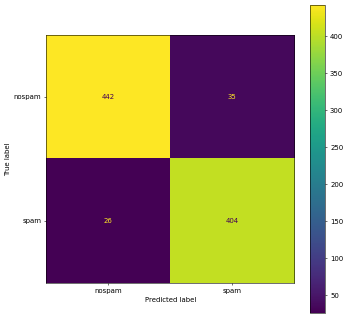

In [49]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':50})
confusion_matrix = metrics.confusion_matrix(test_gt, test_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['nospam', 'spam'])

cm_display.plot()
plt.show()

In [50]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(test_gt, test_preds))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       477
           1       0.92      0.94      0.93       430

    accuracy                           0.93       907
   macro avg       0.93      0.93      0.93       907
weighted avg       0.93      0.93      0.93       907



The **Recall is high** this means that there are few false negatives, **Precision is also high** so false positives are also few. The l'F1-score is high, as well as the accuracy.
In particular, in this task I want to avoid trashing legitimate emails by mistaking them for spam so I want high recall with low false negative values (low number of nospam emails mistaken for spam).

**So I can conclude that the logistic regressor trained on statistically relevant features works very well.**

Since the model without the features with p-value>0.05 works well, I remove these from the dataset to reduce its size.

In [51]:
#removing features that are not statistically no relevant
column_to_drop = ['word_freq_report', 'word_freq_all', 'word_freq_telnet', 
                  'word_freq_receive', 'word_freq_857', 'word_freq_email', 
                  'word_freq_1999', 'word_freq_labs', 'capital_run_length_average',
                  'word_freq_font', 'word_freq_mail', 'word_freq_3d', 'char_freq_quad', 
                  'word_freq_table', 'word_freq_original', 'word_freq_direct', 'char_freq_canc',
                  'word_freq_lab', 'word_freq_85', 'word_freq_credit', 'word_freq_make',
                  'word_freq_415', 'word_freq_people', 'word_freq_parts',
                  'word_freq_pm', 'word_freq_will', 'word_freq_cs', 'word_freq_address']

new_b_df = pd.DataFrame(u_data)
new_b_df.drop(columns=column_to_drop, inplace=True)

Since in the previous step I obtained a good classifier by balancing the dataset, in the next steps I will try to train other classification methods using only the statistically relevant features found and a balanced dataset.

### 2: Decision Trees

A decision tree allows you to tackle a classification problem by defining a series of rules that are applied in a hierarchical manner on the properties of the data under analysis.

In [52]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)
email_tree_train, email_tree_test = train_test_split(new_b_df, test_size=0.25)
print(len(email_tree_train))
print(len(email_tree_test))

2719
907


In [53]:
#the function that generates the decision tree wants as input the ground-truth labels in string format
email_tree_train.loc[email_tree_train["Class"] == 0, "Class"] = 'nospam'
email_tree_train.loc[email_tree_train["Class"] == 1, "Class"] = 'spam'
email_tree_test.loc[email_tree_test["Class"] == 0, "Class"] = 'nospam'
email_tree_test.loc[email_tree_test["Class"] == 1, "Class"] = 'spam'

I trained the tree on statistically relevant features and the balanced dataset.

In [54]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(max_depth=5)
train_tree_preds =dt.fit(email_tree_train.drop('Class',axis=1),email_tree_train['Class'])

Now, I want visualize the tree.

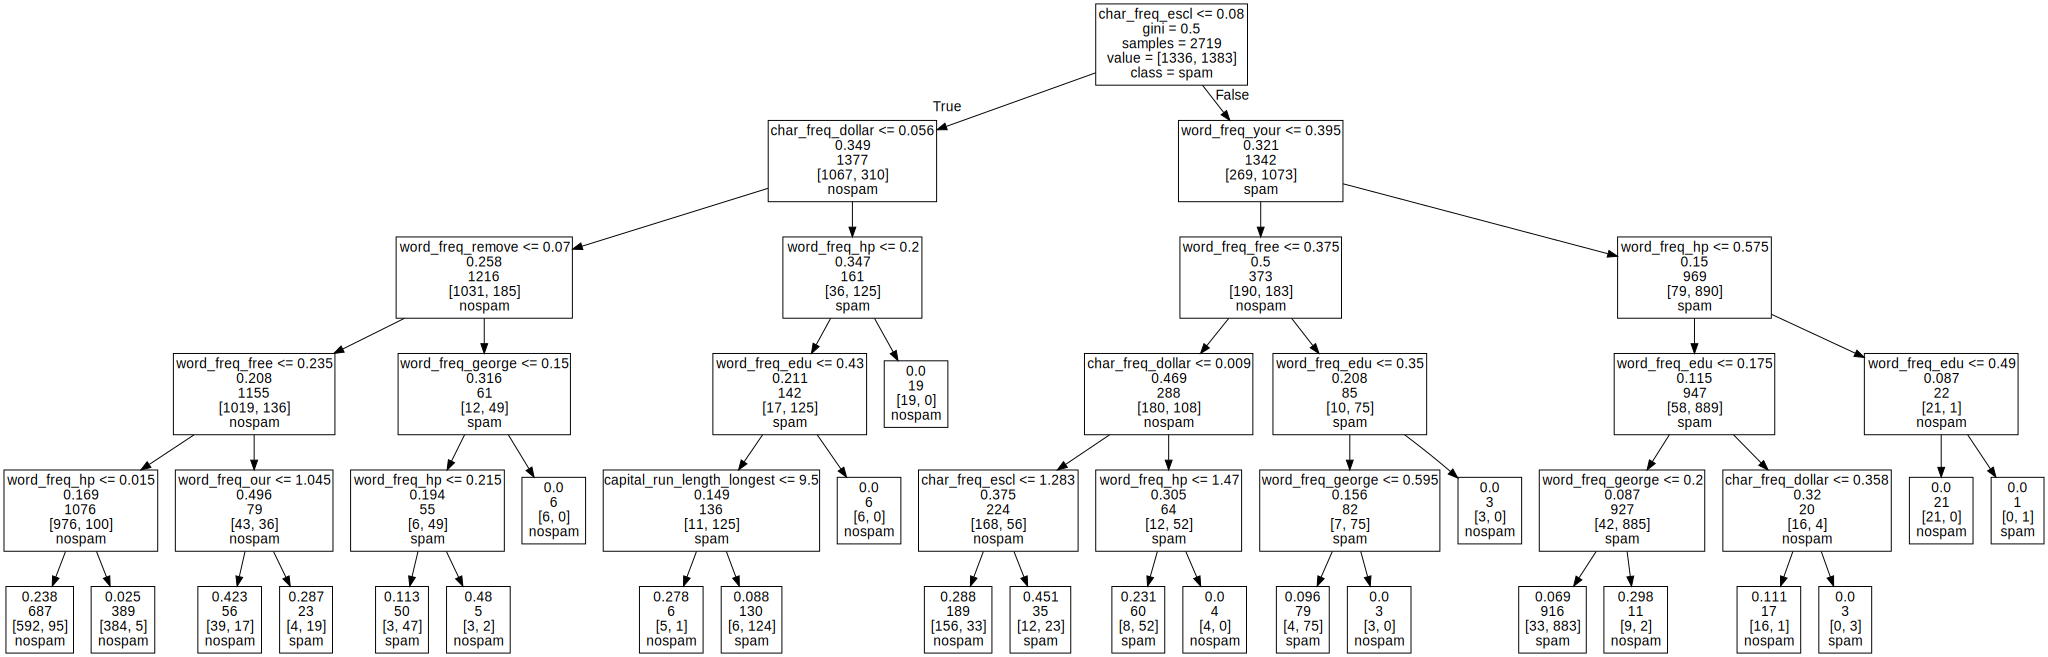

In [55]:
from sklearn import tree
import graphviz 

#specifichiamo, tra le altre cose, il nomi delle feature e quelli delle classi
#specifichiamo rotate=True per visualizzare l'albero in orizzontale
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=email_tree_train.columns[:-1],
                                class_names=dt.classes_, rotate=False, label='root') 
graph = graphviz.Source(dot_data)
graph

In [56]:
#create array of probabilities
y_test_predict_proba = dt.predict_proba(email_tree_test.drop('Class',axis=1))
#test prediction
y_test_predict = dt.predict(email_tree_test.drop('Class',axis=1)) 

Now, I calculate the performances on the test set and the generalization error.

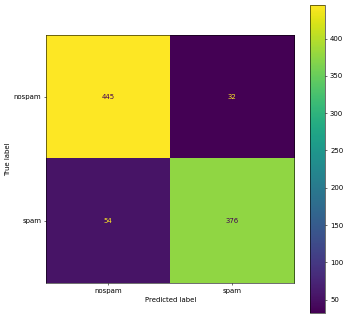

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':50})
confusion_matrix = metrics.confusion_matrix(email_tree_test['Class'], y_test_predict, labels=["nospam", "spam"])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['nospam', 'spam'])

cm_display.plot()
plt.show()

In [58]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(email_tree_test['Class'], y_test_predict))

Classification Report
              precision    recall  f1-score   support

      nospam       0.89      0.93      0.91       477
        spam       0.92      0.87      0.90       430

    accuracy                           0.91       907
   macro avg       0.91      0.90      0.90       907
weighted avg       0.91      0.91      0.91       907



In [59]:
dt_score = dt.score(email_tree_test.drop('Class',axis=1), email_tree_test['Class'])
print("Accuracy di training del modello: %0.2f" % dt.score(email_tree_train.drop('Class',axis=1), email_tree_train['Class']))
print("Accuracy di test del modello: %0.2f" % dt_score)

Accuracy di training del modello: 0.92
Accuracy di test del modello: 0.91


**Decision forests**: a variation to the pruning procedure is to build, using the training set, many trees of limited depth (2 or 3 levels maximum) where the thresholds for splitting are randomly chosen. The leaves obtained are then assigned to the class that holds a clear majority in them. If there is no clear increase the leaf remains grey. When a record is presented to be classified, it is passed to each tree in the forest and each tree will give a response about the class to which it is attributed. This procedure ends by assigning the most voted label to the record.

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=3)

train_tree_preds = rf_model.fit(email_tree_train.drop('Class',axis=1),email_tree_train['Class'])
print(f"(train) accuracy score: {rf_model.score(email_tree_train.drop('Class',axis=1), email_tree_train['Class'])}")
rf_score = rf_model.score(email_tree_test.drop('Class',axis=1),email_tree_test['Class'])
print(f"(test) accuracy score: {rf_score}")
forest_test_predict = rf_model.predict(email_tree_test.drop('Class',axis=1)) 

(train) accuracy score: 0.9168812063258551
(test) accuracy score: 0.9217199558985667


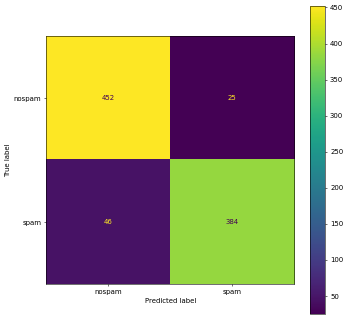

In [61]:
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':50})
confusion_matrix = metrics.confusion_matrix(email_tree_test['Class'], forest_test_predict, labels=["nospam", "spam"])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['nospam', 'spam'])

cm_display.plot()
plt.show()

### 3: K-NN
Each record in a data set can be interpreted as a point in a geometric space. If a distance function is assigned to this space, this can be interpreted as a measure of the dissimilarity between the various records. Starting from this idea and thanks to the flexibility of the concept of distance (or metric) it is possible to capture the proximity (in a semantic sense) between the various records.

In [62]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)
email_knn_train, email_knn_test = train_test_split(new_b_df, test_size=0.25)
print(len(email_knn_train))
print(len(email_knn_test))
X_train = email_knn_train.drop('Class',axis=1)
y_train = email_knn_train['Class']
X_test = email_knn_test.drop('Class', axis=1)
y_test = email_knn_test['Class']

2719
907


### Find the optimal value of K

Different choices of values for the $K$ parameter allow to modify the decision boundary, implicitly found, by the $K-NN$ algorithm. In particular, depending on how the data is distributed in space, a higher value of $K$ allows to reduce the influence of some outliers, while a lower value of $K$ allows to outline a more accurate decision boundary. For example, let's try to see how the training accuracy varies for different choices of $K$:

In [148]:
from sklearn.neighbors import KNeighborsClassifier as KNN

test_accurancies = []
k_values = range(1,len(email_knn_train)) 
for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(email_knn_train.drop('Class',axis=1), email_knn_train['Class'])
    test_accurancies.append(knn.score(email_knn_test.drop('Class',axis=1), email_knn_test['Class']))

Migliore accuracy di test: 0.80
Migliore k: 1.00


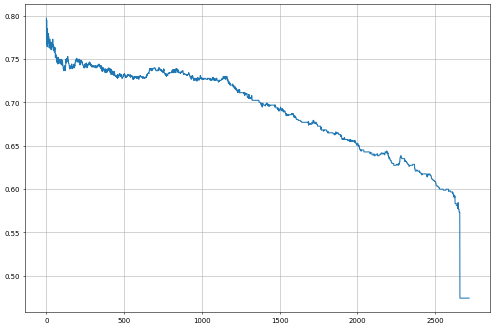

In [149]:
best_index = np.argmax(test_accurancies)
best_k = k_values[best_index]
best_accuracy = test_accurancies[best_index]
print("Migliore accuracy di test: %0.2f" % best_accuracy)
print("Migliore k: %0.2f" % best_k)
    
plt.figure(figsize=(12,8))
plt.plot(k_values,test_accurancies)
plt.grid()
plt.show()

We have discovered what is the optimal $K$ (from the training set) for our dataset and what is the best accuracy (on the test set) achievable. However, we must always remember that test data is not available in the training phase, so **we should never use it to choose parameter values**. So we can choose the best $k$ only by using the training set. This can be done using the GridSearchCV object:

In [150]:
from sklearn.model_selection import GridSearchCV
#define the parameters grid.
param_grid = [ {'n_neighbors':range(1,50)}]
#define the object Grid Search
gs = GridSearchCV(KNN(), param_grid)
#start the research for K.
gs.fit(email_knn_train.drop('Class',axis=1), email_knn_train['Class'])
best_knn = gs.best_estimator_
print("Migliore valore di K trovato utilizzando solo il training set: %d" % best_knn.n_neighbors)

Migliore valore di K trovato utilizzando solo il training set: 1


#### Performance evaluations

In [151]:
knn_score = best_knn.score(email_knn_test.drop('Class',axis=1), email_knn_test['Class'])
print("Accuracy su test set con miglior K trovato sul training set: %0.2f" % knn_score)

Accuracy su test set con miglior K trovato sul training set: 0.80


In [152]:
knn_test_predict = best_knn.predict(email_knn_test.drop('Class',axis=1)) 

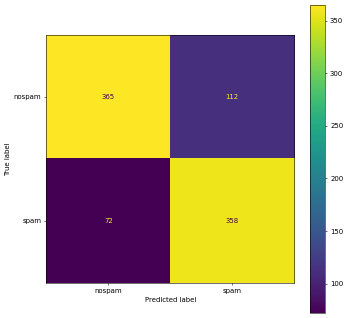

In [153]:
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':50})
confusion_matrix = metrics.confusion_matrix(email_knn_test['Class'], knn_test_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['nospam', 'spam'])

cm_display.plot()
plt.show()

##### Check which is the best algorithm with a bar graph:

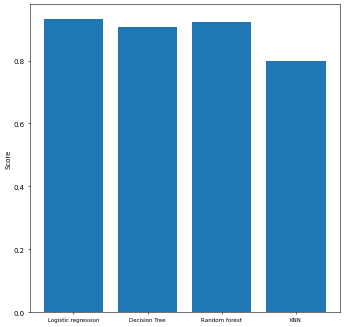

In [154]:
x = np.arange(4)
scores = np.array([ logistic_score, dt_score, rf_score, knn_score])
plt.bar(x, scores)
plt.xticks(x, ('Logistic regression', 'Decision Tree', 'Random forest', 'KNN'), fontsize = 8)
plt.ylabel(ylabel='Score')
plt.show()

As you can see from the graph above, logistic regression and random forest are the classification algorithms that seem to work best. Although both the classification and clustering algorithms give me a high accuracy.
The attributes useful for classification are the statistically significant ones that we had detected.

## 6 Clustering: K-Means
I normalize the data as K-Means is sensitive to values that live on different scales, through the StandardScaler object. This means that the data has a mean of zero and a standard of 1.

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_array = scaler.fit_transform(feat_df.drop('Class', axis=1))#rimuovo le etichette della classe.
scaled_dataframe = pd.DataFrame( scaled_array, columns = feat_df.drop('Class', axis=1).columns )

I train K-Means in order to find two clusters, with random initialization and for 1000 iterations.

In [64]:
kmeans = KMeans(init='random', n_init=10, n_clusters=2,  max_iter=1000)
kmeans.fit(scaled_dataframe)

KMeans(init='random', max_iter=1000, n_clusters=2, n_init=10)

The model ran and found the **2 centroids** that represent my 2 clusters. Let's try to show the coordinates:

In [65]:
centroids = kmeans.cluster_centers_
centroids

array([[-3.42433707e-01, -2.05697886e-02, -5.56760578e-01,
        -4.68995838e-02, -2.60053791e-01, -3.50266176e-01,
        -2.91793886e-01, -2.62561558e-01, -3.23302359e-01,
        -2.80120601e-01, -2.96859527e-01, -4.16727873e-01,
        -3.12055206e-01, -1.74927167e-01, -1.90114405e-01,
        -3.01377603e-01, -3.21135414e-01,  4.75561250e-02,
        -7.38262845e-01, -1.67893113e-01, -5.60022959e-01,
        -1.18171509e-01, -2.90209203e-01, -2.12994388e-01,
         3.67912610e+00,  3.45956459e+00,  6.99814781e-01,
         5.95836670e+00,  5.23609812e+00,  7.20383580e+00,
         8.10409557e+00,  9.50692643e+00, -1.74920257e-01,
         9.47895737e+00,  6.06558668e+00,  8.03829733e+00,
        -3.23455613e-01, -5.98362369e-02, -1.80911344e-01,
         8.74217892e+00, -1.20904684e-01, -1.60923974e-02,
        -2.05993114e-01, -2.96327734e-03, -2.97776209e-01,
        -1.22487598e-01, -7.13879045e-02, -1.11546231e-01,
        -1.58453362e-01,  2.82436394e+00, -1.55197675e-0

I add the detected clusters to the dataframe.

In [66]:
clusters = kmeans.labels_
#attacco i cluster rilevati al dataframe
scaled_dataframe["cluster"] = kmeans.labels_.astype(int)
print(clusters)
kmeans.cluster_centers_.shape

[1 1 1 ... 1 1 1]


(2, 57)

#### Silhouette.
The Silhouette index, defined as $[-1,1]$, is interpreted as a measure of data consistency within a cluster. It can be represented graphically and describes how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, the cluster configuration is appropriate. If many points have a low or negative value, the clustering configuration may have too many or too few clusters.

**The higher the silhouette index, the better the clustering**

In [67]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_dataframe, scaled_dataframe['cluster'], metric='euclidean') #indice di silhouette medio

0.6599169903352016

I then calculated the silhouette index over several K in order to find the best number of clusters for this dataset. I try to iterate K from 2 to 25, for each of these I create a K-means and save the corresponding silhouette index inside a dictionary:

In [68]:
k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    model_kmeans_k = KMeans( n_clusters = k )
    model_kmeans_k.fit(scaled_dataframe)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(scaled_dataframe, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    
print("Done!")

C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 2	SS: 0.6599


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 3	SS: 0.1251


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 4	SS: 0.1563


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 5	SS: 0.0816


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 6	SS: 0.0967


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 7	SS: 0.1209


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 8	SS: 0.1293


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 9	SS: 0.0567


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 10	SS: 0.1085


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 11	SS: 0.0687


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 12	SS: 0.1340


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 13	SS: 0.0731


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 14	SS: 0.1215


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 15	SS: 0.0571


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 16	SS: 0.0545


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 17	SS: 0.1086


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 18	SS: 0.0935


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 19	SS: 0.1250


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 20	SS: 0.1131


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 21	SS: 0.1200


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 22	SS: 0.1118


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 23	SS: 0.0691


C:\Users\macca\anaconda3\envs\fad_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 24	SS: 0.1065
Done!


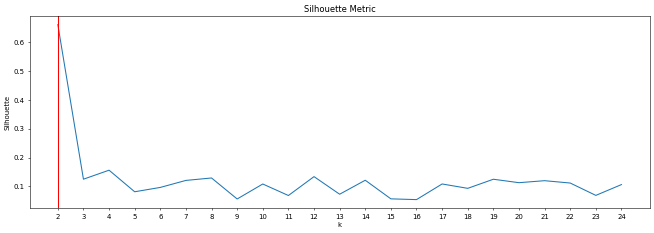

In [69]:
plt.figure(figsize = (16,5))
plt.plot(silhouette_scores.values())
plt.xticks(range(0,23,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(0, color = "r")
plt.show()

As the silhouette index suggests, we have a **greater purity of the clustering** - in this dataset - by choosing **K=2**, which effectively corresponds to the two classes in which the dataset is labeled. **By increasing the hyperparameter K we get increasingly dirtier clusters.**

**END**